In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
from sklearn.datasets import fetch_california_housing as dataset

dataset = dataset()
X = pd.DataFrame(dataset.data, columns = dataset.feature_names)
X.drop(['Latitude', 'Longitude'], axis = 1, inplace = True)

y = pd.DataFrame(dataset.target, columns = ['Target']) 

In [3]:
from sklearn.model_selection import train_test_split as tts

X_train_full, X_test, y_train_full, y_test = tts(X, y, random_state = 42)
X_train, X_valid, y_train, y_valid = tts(X_train_full, y_train_full, random_state = 42)

In [4]:
layer = tf.keras.layers
Layers = [layer.Dense(30, activation = "relu", name = "hiddenLayer1", input_shape = X_train.shape[1:]),
          layer.Dense(10, activation = "relu", name = "hiddenLayer2"),
          layer.Dense(5, activation = "relu", name = "hiddenLayer3"),
          layer.Dense(1, name = "outputLayer")]

# Here we use X_train.shape[1:] cause, X_train.shape provides (no. of samples, no. of features) and the model doesn't need to know the 'no. of samples' for defining the shape of a single input 

model_clf = tf.keras.models.Sequential(Layers)
model_clf.summary()

C:\Users\rishi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hiddenLayer1 (Dense)                 │ (None, 30)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer3 (Dense)                 │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
Loss_function = "MSE"
Optimizer = "SGD"

model_clf.compile(loss = Loss_function, optimizer = Optimizer)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [7]:
Epochs = 20
Validation_Set = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs = Epochs, validation_data = Validation_Set)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0749 - val_loss: 9.5031
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7230 - val_loss: 0.5187
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5483 - val_loss: 0.4710
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4918 - val_loss: 0.4487
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5041 - val_loss: 0.4314
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4647 - val_loss: 0.4232
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4536 - val_loss: 0.4148
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4552 - val_loss: 0.4097
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4515 - val_loss: 0.4084
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4545 - val_loss: 0.4100
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4251 - val_loss: 0.4287
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [8]:
pd.DataFrame(history.history)

,loss,val_loss
0,1.383060,9.503090
1,0.658884,0.518655
2,0.529601,0.470958
3,0.497761,0.448694
4,0.480127,0.431363
5,0.466026,0.423153
6,0.456722,0.414779
7,0.448588,0.409744
8,0.444734,0.408367
9,0.441537,0.409957


<Axes: >

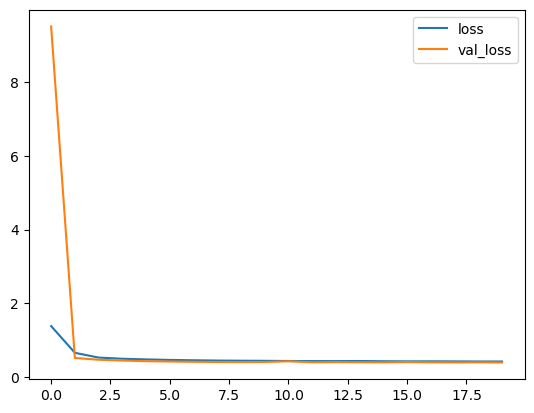

In [9]:
pd.DataFrame(history.history).plot()

In [10]:
model_clf.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4367


0.4280206859111786

In [11]:
new = X_test[0].reshape((1, 6))
new

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735]])

In [12]:
model_clf.predict(new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0.90239275]], dtype=float32)

## Callback Functions

In [13]:
model_clf = tf.keras.models.Sequential(Layers)

Loss_function = "mse"
Optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3)

model_clf.compile(loss = Loss_function, optimizer = Optimizer)

In [14]:
Epochs = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
tensor_board_cb = tf.keras.callbacks.TensorBoard(log_dir = "logs")

Callbacks = [checkpoint_cb, early_stopping_cb, tensor_board_cb]

history = model_clf.fit(X_train, y_train, epochs = Epochs, 
                        validation_data = Validation_Set, callbacks = Callbacks)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4196 - val_loss: 0.3954
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4104 - val_loss: 0.3973
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4211 - val_loss: 0.3955
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4222 - val_loss: 0.3957
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4377 - val_loss: 0.3950
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3931 - val_loss: 0.3949
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4101 - val_loss: 0.3956
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4231 - val_loss: 0.3951
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4057 - val_loss: 0.3946
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4032 - val_loss: 0.3947
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4188 - val_loss: 0.3947
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [20]:
%load_ext tensorboard 
%tensorboard serve --logdir=logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 21884), started 0:03:47 ago. (Use '!kill 21884' to kill it.)

In [22]:
model_clf.predict(new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.86934406]], dtype=float32)